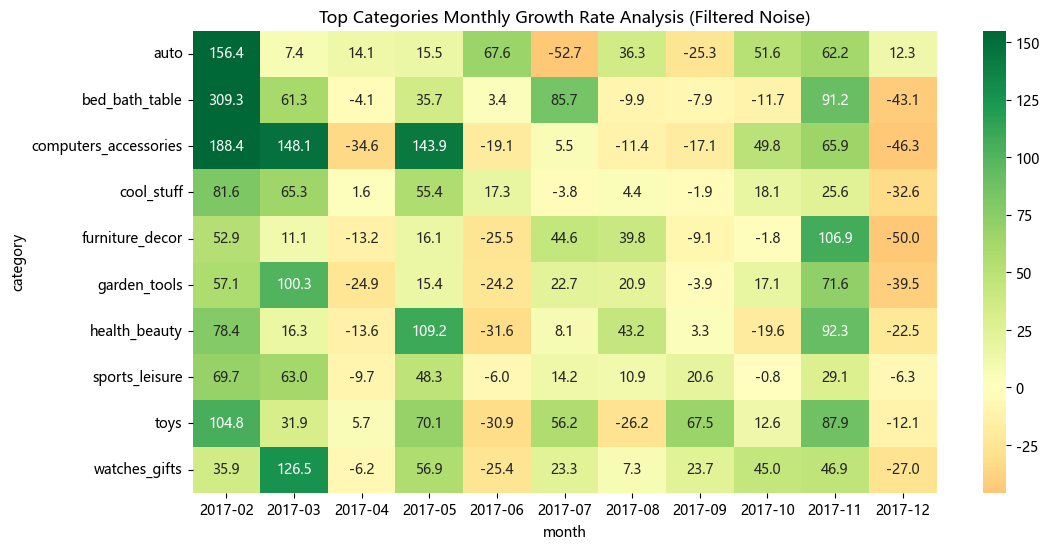

In [ ]:
from config import * # Import all configurations
%matplotlib inline

with open('../sql_scripts/05_category_monthly_growth_analysis.sql', 'r') as f:
    query = f.read()
df = pd.read_sql(query, conn)

# 1. 处理数据

# 将百分比字符串转换为浮点数，因为还原为浮点数才能进行颜色映射
df['growth_num'] = df['growth_pct'].str.replace('%', '').astype(float)

# 2. 数据清洗
# 用 groupby 汇总了每个类目的年总营收，并取前 10 名，避免由于基数太小产生的异常值干扰视觉
top_cats = df.groupby('category')['monthly_revenue'].sum().nlargest(10).index

df_clean = df[(df['category'].isin(top_cats)) & (df['last_monthly_revenue'] > 0)]

# 3. 构建透视表： Category（类目）作为纵轴 (index)，将 Month（月份）作为横轴 (columns)
pivot_table = df_clean.pivot(index='category', columns='month', values='growth_num')

# 4. 绘图
plt.figure(figsize=(12, 6))
# 设置 robust=True 可以自动处理异常颜色区间
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="RdYlGn", center=0, robust=True)
plt.title("Top Categories Monthly Growth Rate Analysis (Filtered Noise)")
plt.show()